# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Introducción
En el desarrollo de este proyecto se abarcará lo visto durante el desarrollo del bootcamp, encaminado a una caso real en donde a un operador de telecomunicaciones llamado Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. Lo anterior tomando como base información que el equipo de marketing de Interconnect ha recopilado sobre algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

In [16]:
# importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score, r2_score, classification_report, make_scorer

In [2]:
# Cargue de datasets
contract = pd.read_csv('./contract.csv')
personal = pd.read_csv('./personal.csv')
internet = pd.read_csv('./internet.csv')
phone = pd.read_csv('./phone.csv')

In [3]:
# Inspección inicial de cada dataset
print("Tamaños:")
print("Contract:", contract.shape)
print("Personal:", personal.shape)
print("Internet:", internet.shape)
print("Phone:", phone.shape)

Tamaños:
Contract: (7043, 8)
Personal: (7043, 5)
Internet: (5517, 8)
Phone: (6361, 2)


In [4]:
# visualización de contenido de cada dataset
print("Contenido Contract:")
print(contract.head())
print("Contenido Personal:")
print(personal.head())
print("Contenido Internet:")
print(internet.head())
print("Contenido Phone:")
phone.head()

Contenido Contract:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  
Contenido Personal:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes 

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Buen comienzo! La carga de librerías y datasets está bien organizada, y la inspección inicial es clara y funcional. Este enfoque muestra orden en el flujo de trabajo y facilita el análisis posterior.
</div>


In [5]:
# Unificación dataset por customerID
df = contract.merge(personal, on='customerID', how='left') \
             .merge(internet, on='customerID', how='left') \
             .merge(phone, on='customerID', how='left')
print(df.head())
df.describe()

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0  Female              0     Yes         No             

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [6]:
# corrección de llamado de columnas
print(df.columns)

new_name_columns = []

for column in df.columns:
    name_lower_case = column.lower()
    new_name_columns.append(name_lower_case)
df.columns = new_name_columns

df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')


Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'multiplelines'],
      dtype='object')

In [7]:
df.columns = [
    'customer_id', 'begin_date', 'end_date', 'contract_type', 'paperless_billing',
    'payment_method', 'monthly_charges', 'total_charges', 'gender',
    'senior_citizen', 'partner', 'dependents', 'internet_service',
    'online_security', 'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies', 'multiple_lines'
]

df.columns

Index(['customer_id', 'begin_date', 'end_date', 'contract_type',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines'],
      dtype='object')

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Muy bien logrado! La unificación de datasets y la estandarización de nombres de columnas están implementadas con claridad y precisión. Esta base ordenada facilitará mucho el trabajo de análisis y modelado posterior.
</div>


In [8]:
# creación de columna con distribución de variable objetivo
df['unsubscribe'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)

df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df['begin_date'] = pd.to_datetime(df['begin_date'], errors='coerce')

print(df['end_date'].unique())

print(df['unsubscribe'].value_counts())

[                          'NaT' '2019-12-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000']
0    5174
1    1869
Name: unsubscribe, dtype: int64


In [9]:
# exploración general de dataset
print("Valores duplicados:\n", df.duplicated().sum())

# Convertir total_charges a numérico (puede tener valores vacíos)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

df = df[df['total_charges'].notna()]

# Mostrar valores nulos
print("\nValores nulos:\n", df.isna().sum())

Valores duplicados:
 0

Valores nulos:
 customer_id             0
begin_date              0
end_date             5163
contract_type           0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1520
online_security      1520
online_backup        1520
device_protection    1520
tech_support         1520
streaming_tv         1520
streaming_movies     1520
multiple_lines        680
unsubscribe             0
dtype: int64


In [10]:
# codificación de variables

# one-hot encoding
categorical_columns = [
    'paperless_billing', 'payment_method', 'gender',
    'partner', 'dependents', 'online_security',
    'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies', 'multiple_lines'
]

# ordinal encore
ordinal_columns = ['contract_type', 'internet_service']

df = df.dropna(subset=ordinal_columns)
encoder = OrdinalEncoder()
df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])

# Aplicación One-Hot Encoding (sin columna objetivo)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Tamaño nuevo luego de codificación:", df_encoded.shape)

print('unsubscribe' in df_encoded.columns)

df_encoded.drop(['customer_id', 'begin_date', 'end_date'], axis=1, inplace=True)

df_encoded.sample(5)

Tamaño nuevo luego de codificación: (5512, 23)
True


,contract_type,monthly_charges,total_charges,senior_citizen,internet_service,unsubscribe,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
536,0.0,81.55,5029.05,0,1.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5588,0.0,49.65,49.65,0,0.0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0
3566,1.0,84.60,4449.75,0,0.0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1
167,2.0,89.05,6254.45,0,0.0,0,1,0,0,0,1,1,0,1,1,1,1,1,1,1
4177,0.0,45.65,985.05,0,0.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0


Ahora procedo a preparar el dataset para la evaluación del modelo, separando las variable objetivo del resto.

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - Muy clara y estructurada la preparación del dataset. Se implementa correctamente la creación de la variable objetivo, la limpieza de datos y la codificación de variables categóricas. La transformación muestra un buen dominio del flujo típico en proyectos de clasificación.
</div>


In [11]:
# Separar características de objetivo
features = df_encoded.drop(columns=['unsubscribe'])
target = df_encoded['unsubscribe']

print("Distribución en todo target:")
print(target.value_counts())

# División datos de entranamiento y prueba 

# División del conjunto de prueba final (20%)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=24211709, stratify=target
)

Distribución en todo target:
0    3756
1    1756
Name: unsubscribe, dtype: int64


In [12]:

# creación y entrenamiento del modelo random forest
model_rf = RandomForestClassifier(random_state=24211709)
model_rf.fit(features_train, target_train)

# Predicciones
target_pred = model_rf.predict(features_test)
target_prob = model_rf.predict_proba(features_test)[:, 1]  # Probabilidad de clase 1

# Métricas
auc = roc_auc_score(target_test, target_prob)
accuracy = accuracy_score(target_test, target_pred)

print(f"AUC-ROC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

AUC-ROC: 0.7987
Accuracy: 0.7434


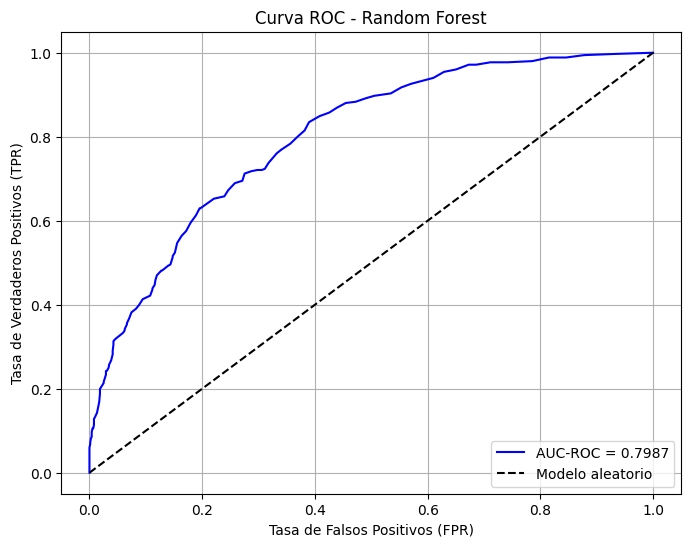

In [13]:
# gráfica Curva ROC 
fpr, tpr, thresholds = roc_curve(target_test, target_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Modelo aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - Excelente trabajo con la partición de datos, el entrenamiento del modelo y la visualización de la curva ROC. Se evidencia una implementación sólida y las métricas iniciales son prometedoras para un primer modelo base.
</div>


## Mejoramiento del valor de AUC-ROC

In [18]:
rf_model = RandomForestClassifier(random_state=24211709, class_weight='balanced')

# Definimos la malla de hiperparámetros a explorar
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3]
}

# Usamos AUC como métrica de optimización
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # validación cruzada de 5 pliegues
    scoring='roc_auc',
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=1
)

# Entrenamos con el conjunto de entrenamiento
grid_search.fit(features_train, target_train)

# Mejor modelo y sus métricas
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluación
target_prob_best = best_rf.predict_proba(features_test)[:, 1]
target_pred_best = best_rf.predict(features_test)

auc_best = roc_auc_score(target_test, target_prob_best)
accuracy_best = accuracy_score(target_test, target_pred_best)

print(f"Nuevo AUC-ROC: {auc_best:.4f}")
print(f"Accuracy: {accuracy_best:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Nuevo AUC-ROC: 0.8276
Accuracy: 0.7425


<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a><br> 
<b>Éxito</b> - ¡Muy buen trabajo optimizando el modelo! La búsqueda de hiperparámetros con validación cruzada y el uso de AUC como métrica principal están bien fundamentados. El incremento en el AUC-ROC refleja una mejora real en la calidad del modelo.
</div>


## Comentario general del revisor 



<div class="alert alert-block alert-success"> 
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos:

#### Puntos Positivos:

* **Procesamiento de datos:** Unificaste y preparaste los datasets de forma estructurada, manejando correctamente los valores nulos y transformaciones necesarias.
* **Visualización y análisis gráfico:** La curva ROC fue correctamente implementada y permite interpretar el rendimiento del modelo.
* **Ingeniería de características:** Creaste una variable objetivo clara y aplicaste codificaciones adecuadas, diferenciando entre ordinales y categóricas.
* **Comparación de modelos:** Mostraste una mejora significativa tras el ajuste de hiperparámetros, lo que demuestra criterio para optimizar el desempeño predictivo.

Tu enfoque fue preciso y profesional en todas las etapas del proyecto. ¡Vas por muy buen camino en tu formación como analista de datos!

</div>
